<a href = "https://www.pieriantraining.com"><img src="../PT Centered Purple.png"> </a>

<em style="text-align:center">Copyrighted by Pierian Training</em>

# Image Inpainting
In this notebook we are going to inspect how to use AWS Bedrock to inpaint images using the [Amazon Titan Image Generator](https://docs.aws.amazon.com/bedrock/latest/userguide/titan-image-models.html)!

## API Connection
Let's directly use the bedrock runtime

In [137]:
import boto3
import json
import base64
from PIL import Image

bedrock_runtime = boto3.client(aws_access_key_id="",
                               aws_secret_access_key="",
                               region_name="us-east-1",
                               service_name='bedrock-runtime')


### Amazon Titan image Parameters
Amazon Titan models accept the following [parameters](https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-image.html) for text to image generation:

- **taskType**
  - Value: `"INPAINTING"`
- **inPaintingParams**
  - `text`: String (Optional)
      - Inpainting prompt 
  - `negativeText`: String (Optional)
      - What you don't want to include in the image (e.g violence)
  - `image` base64 (Required)
      - The image you want to inpaint
  - `maskImage` base64 (Required)
      - The mask you want to use for inpainting
- **imageGenerationConfig**
  - `numberOfImages`: Integer (Range: 1 to 5)
  - `quality`: String (Options: `"standard"` / `"premium"`)
  - `height`: Integer (Supported height max: 1024)
  - `width`: Integer (Supported width max: 1024)
  - `cfgScale`: Float (Range: 1.0 (exclusive) to 10.0)
  - `seed`: Integer (Range: 0 to 214783647)
   
Thus, the model expects the following jsonified request body:
```
(
    {
        "taskType": "INPAINTING",
        "inPaintingParams": {
            "text": "The person stands somewhere next to the Eiffel Tower.",
            "negativeText": "photorealistic", 
            "image": image_string,
            "maskImage": image_string_mask
        },                                                 
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "quality": "premium",
            "height": 512,
            "width": 512,
            "cfgScale": 8.0
        }
    })
```

Let's make Napoleon stand close to the Eiffel Tower!<br />
To use Titan's inpainting we need to convert both, image and mask, to base64:


In [170]:
with open("napoleon.png", "rb") as f:
    content = f.read()
    image_string = base64.b64encode(content).decode("utf-8")


In [171]:
with open("mask.png", "rb") as f:
    content = f.read()
    image_string_mask = base64.b64encode(content).decode("utf-8")


In [186]:
request_body = json.dumps(
    {
        "taskType": "INPAINTING",
        "inPaintingParams": {
            "text": "The person stands somewhere next to the Eiffel Tower on green grass on a sunny day. Everything is drawn like a cartoon!",
            "negativeText": "photorealistic", 
            "image": image_string,
            "maskImage": image_string_mask
        },                                                 
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "quality": "premium",
            "height": 512,
            "width": 512,
            "cfgScale": 8.0
        }
    }
)


The response structure is identical to the one described in *02-Amazon-Titan-Image-Generator*

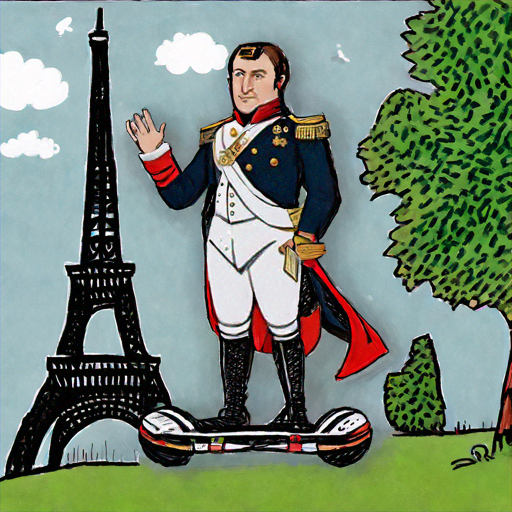

In [187]:
response = bedrock_runtime.invoke_model(body=request_body, modelId="amazon.titan-image-generator-v1")
response_body = json.loads(response.get('body').read())
base64_image_data = base64.b64decode(response_body["images"][0])

file_path = "napoleon_inpainting.png"
with open(file_path, "wb") as file:
    file.write(base64_image_data)
Image.open("napoleon_inpainting.png")


Now Napoleon can finally see the Eiffel Tower even if he died roughly 66 years before it was built! 